# Data Wrangling + EDA

Para esta actividad se proporcionaron los datos u.data y u.item.Se hizo la transformación a csv siguiendo el diccionario de datos proporcionado en README

## Módulos

In [38]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

## Carga de datos

In [25]:
df1 = pd.read_csv('users.csv')
df2 = pd.read_csv('items.csv')

## Exploración inicial

En esta parte buscaremos unir los dos dataframes en uno final que consolide los datos de ambos archivos

In [26]:
df1.columns

Index(['user_id', 'item_id', 'rating', 'timestamp_unix', 'timestamp_decoded'], dtype='object')

In [27]:
df2.columns

Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [66]:
df = pd.merge(df1, df2, left_on='item_id', right_on='movie_id', how='inner')


Procedemos a explorar nulos y su tratamiento de ser necesario

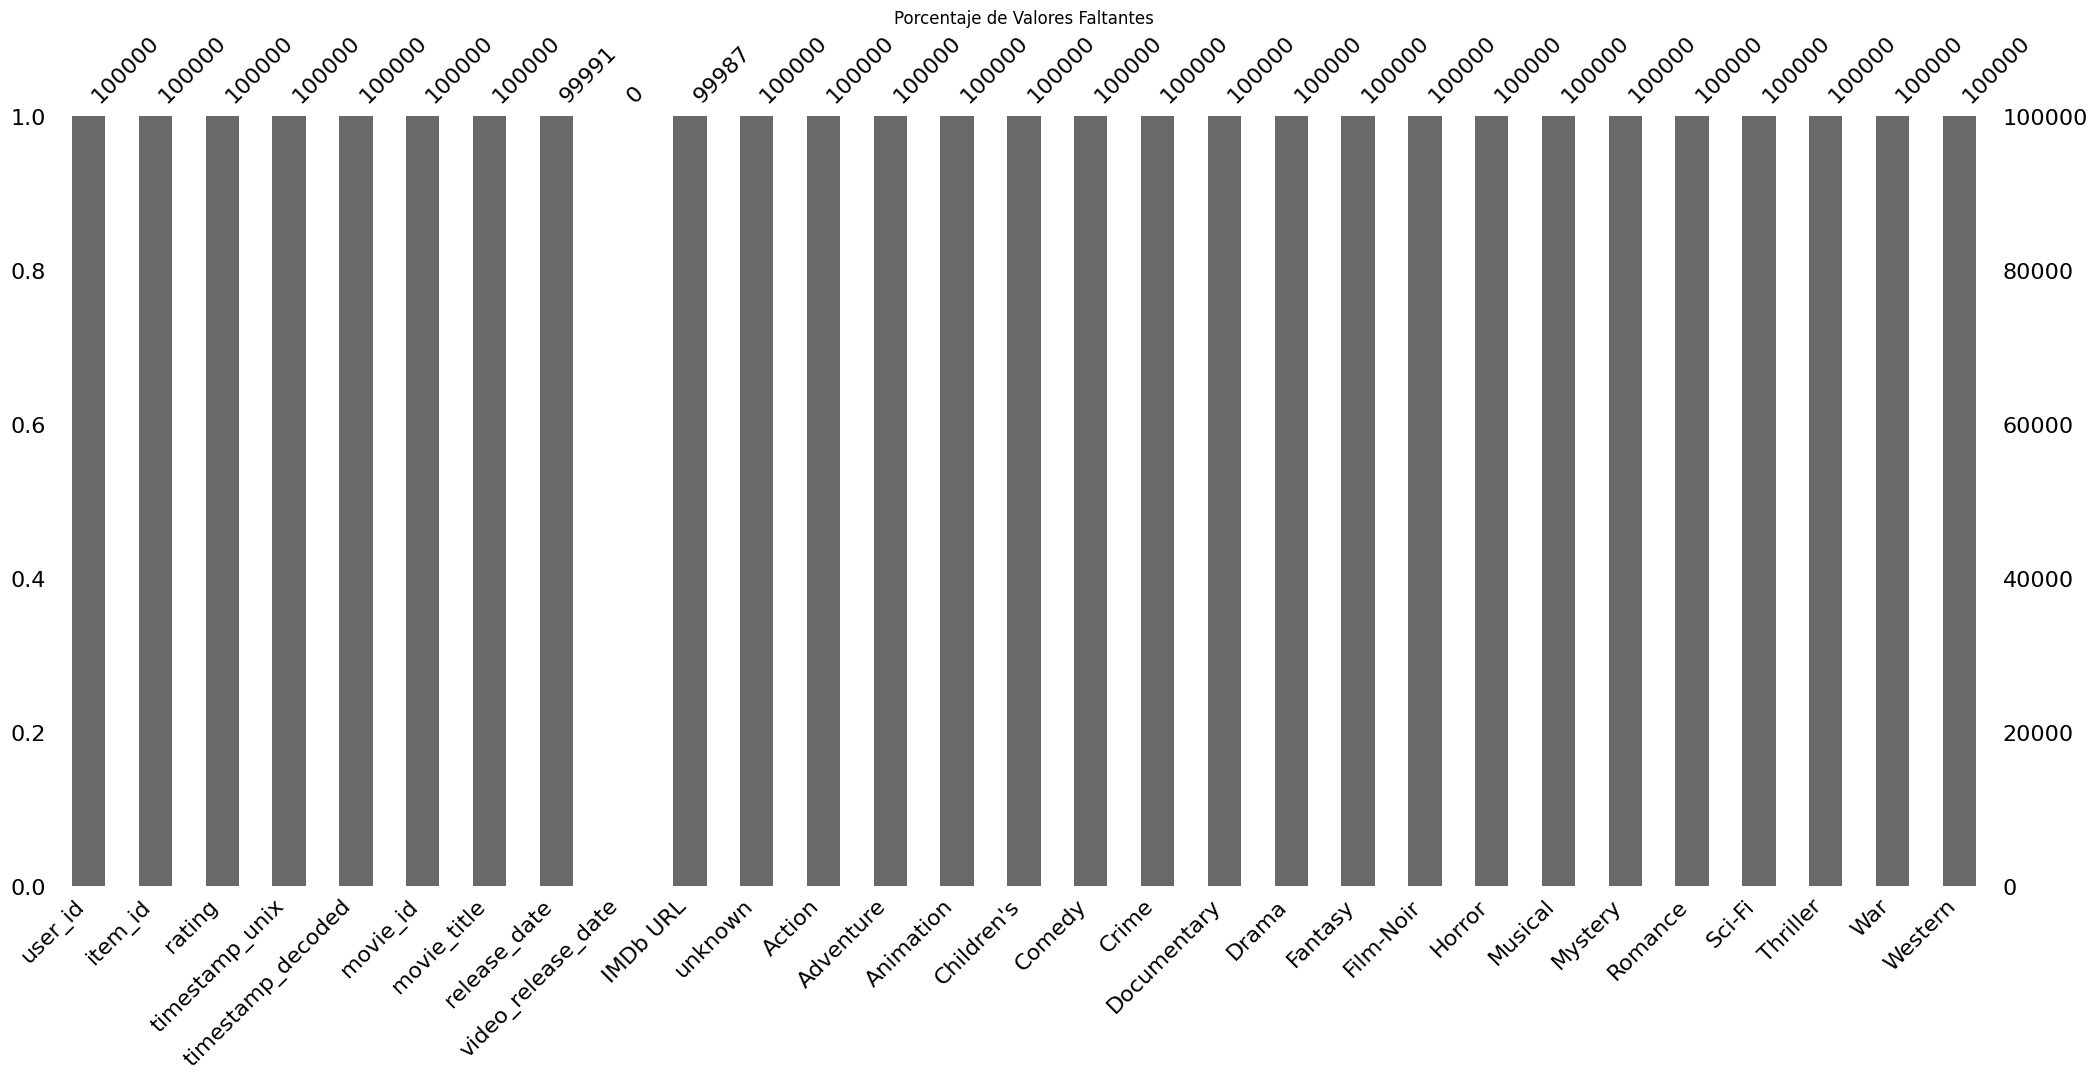

In [67]:
msno.bar(df)

plt.title('Porcentaje de Valores Faltantes')
plt.show()

In [68]:
df = df.drop(columns =['video_release_date','IMDb URL'])

# EDA

## Número de usuarios y número de películas.

In [46]:
num_usuarios = df['user_id'].nunique()  
num_peliculas = df['item_id'].nunique()  

print(f"Número de usuarios: {num_usuarios}")
print(f"Número de películas: {num_peliculas}")

Número de usuarios: 943
Número de películas: 1682


## Las 3 películas con mejor promedio y las 3 películas con peor promedio.

In [61]:
#Sacamos el promedio agrupando por título
promedio_peliculas = df.groupby('movie_title')['rating'].mean().reset_index()

mejores_peliculas = promedio_peliculas.sort_values(by='rating', ascending=False).head(3)
peores_peliculas = promedio_peliculas.sort_values(by='rating', ascending=True).head(3)

print("Las 3 películas con el mejor promedio de calificaciones:")
print(mejores_peliculas)

print("\nLas 3 películas con el peor promedio de calificaciones:")
print(peores_peliculas)


Las 3 películas con el mejor promedio de calificaciones:
                                     movie_title  rating
1472              They Made Me a Criminal (1939)     5.0
944   Marlene Dietrich: Shadow and Light (1996)      5.0
1273        Saint of Fort Washington, The (1993)     5.0

Las 3 películas con el peor promedio de calificaciones:
                                      movie_title  rating
483  Eye of Vichy, The (Oeil de Vichy, L') (1993)     1.0
251                         Butterfly Kiss (1995)     1.0
371                                  Daens (1992)     1.0


## La película con el mayor número de calificaciones y cuántas son.

In [62]:
# Agrupa por título de película y calcula el recuento de calificaciones
recuento_peliculas = df.groupby('movie_title')['rating'].count().reset_index()

pelicula_mayor_recuento = recuento_peliculas[recuento_peliculas['rating'] == recuento_peliculas['rating'].max()]

print(f"La película con el mayor número de calificaciones es: {pelicula_mayor_recuento['movie_title'].values[0]}")
print(f"El número de calificaciones es: {pelicula_mayor_recuento['rating'].values[0]}")


La película con el mayor número de calificaciones es: Star Wars (1977)
El número de calificaciones es: 583


## El usuario que ha calificado un mayor número de películas y cuántas ha calificado

In [64]:
# Agrupa por ID de usuario y calcula el recuento de calificaciones
recuento_usuarios = df.groupby('user_id')['rating'].count().reset_index()

usuario_mayor_recuento = recuento_usuarios[recuento_usuarios['rating'] == recuento_usuarios['rating'].max()]

print(f"El usuario que ha calificado el mayor número de películas es: {usuario_mayor_recuento['user_id'].values[0]}")
print(f"Número de películas calificadas por este usuario: {usuario_mayor_recuento['rating'].values[0]}")


El usuario que ha calificado el mayor número de películas es: 405
Número de películas calificadas por este usuario: 737


## El número promedio de evaluaciones por película.

In [65]:
# Calcula el promedio de calificaciones por película
promedio_evaluaciones_por_pelicula = df.groupby('movie_title')['rating'].count().mean()

print(f"El número promedio de evaluaciones por película es: {promedio_evaluaciones_por_pelicula:.2f}")


El número promedio de evaluaciones por película es: 60.10


## Calcular el número de películas por año.

In [77]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

num_peliculas_por_anio = df.groupby('year')['movie_title'].nunique()
num_peliculas_por_anio = num_peliculas_por_anio.to_frame().reset_index()
num_peliculas_por_anio = num_peliculas_por_anio.sort_values(by='movie_title', ascending=False)


num_peliculas_por_anio

,year,movie_title
68,1996.0,353
69,1997.0,276
67,1995.0,219
66,1994.0,214
65,1993.0,125
...,...,...
1,1926.0,1
4,1932.0,1
3,1931.0,1
2,1930.0,1
